In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv(r"C:\Users\Swati\OneDrive\Desktop\DataScience\Projects\Malignant Comments Classifier Project\train.csv")
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
df_test = pd.read_csv(r"C:\Users\Swati\OneDrive\Desktop\DataScience\Projects\Malignant Comments Classifier Project\test.csv")
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [4]:
print('No. of Rows :',df_train.shape[0])
print('No. of Columns :',df_train.shape[1])
pd.set_option('display.max_columns',None)

No. of Rows : 159571
No. of Columns : 8


In [5]:
print('No. of Rows :',df_test.shape[0])
print('No. of Columns :',df_test.shape[1])
pd.set_option('display.max_columns',None)

No. of Rows : 153164
No. of Columns : 2


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [8]:
df_train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df_test.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
freq,1,1


In [10]:
df_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [11]:
df_test.isnull().sum()

id              0
comment_text    0
dtype: int64

In [12]:
df_train.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


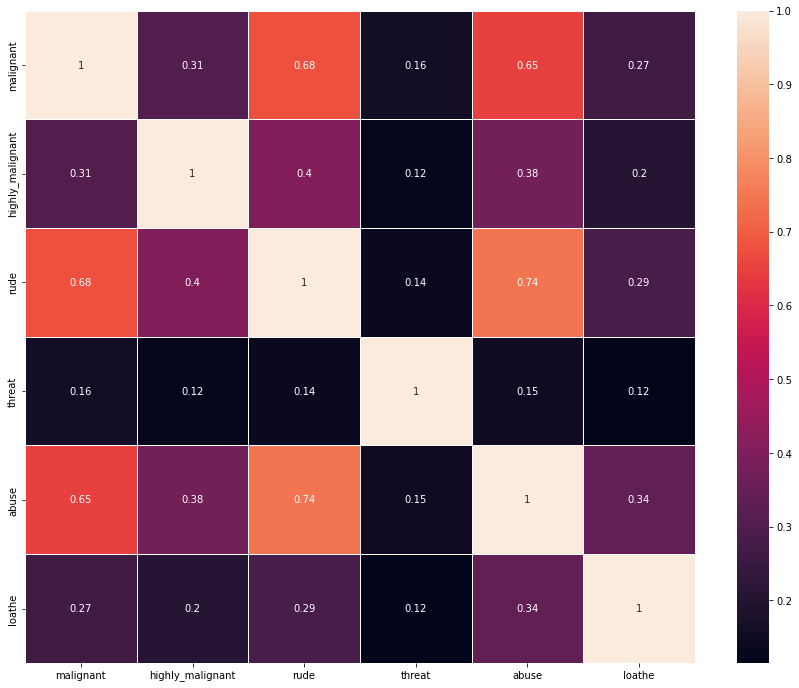

In [13]:
plt.figure(figsize=(15,12))
sns.heatmap(df_train.corr(),annot=True,linewidth=0.5)
plt.show()

In [14]:
df_train.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

malignant


0    144277
1     15294
Name: malignant, dtype: int64


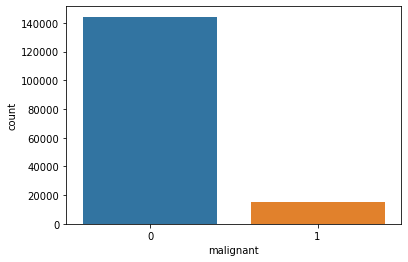

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


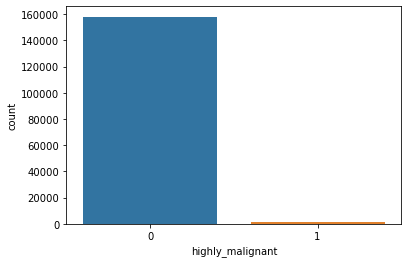

rude


0    151122
1      8449
Name: rude, dtype: int64


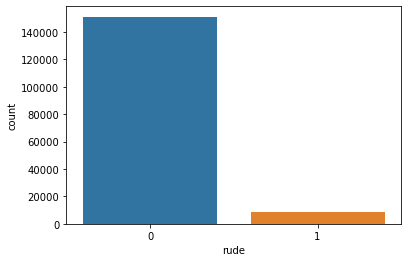

threat


0    159093
1       478
Name: threat, dtype: int64


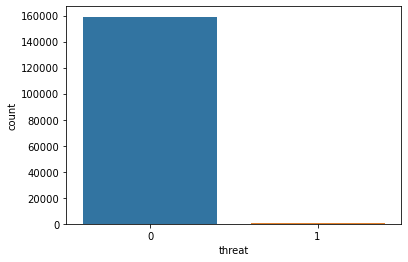

abuse


0    151694
1      7877
Name: abuse, dtype: int64


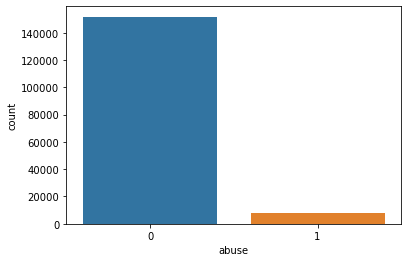

loathe


0    158166
1      1405
Name: loathe, dtype: int64


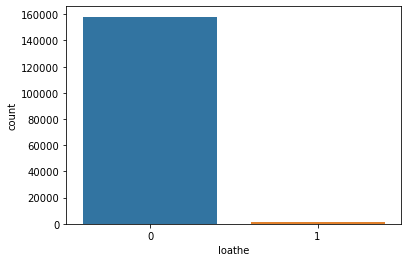

In [15]:
col=['malignant','highly_malignant','rude','threat','abuse','loathe']
for i in col:
    print(i)
    print("\n")
    print(df_train[i].value_counts())
    sns.countplot(df_train[i])
    plt.show()

In [16]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [17]:
df_train['length'] = df_train['comment_text'].str.len()
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [18]:
# Convert all messages to lower case
df_train['comment_text'] = df_train['comment_text'].str.lower()

# Replace email addresses with 'email'
df_train['comment_text'] = df_train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df_train['comment_text'] = df_train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df_train['comment_text'] = df_train['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df_train['comment_text'] = df_train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
df_train['comment_text'] = df_train['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


df_train['comment_text'] = df_train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df_train['comment_text'] = df_train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
df_train['comment_text'] = df_train['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split(

)))

In [19]:
df_train['clean_length'] = df_train.comment_text.str.len()
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47


In [24]:
# Total length removal
print ('Origian Length', df_train.length.sum())
print ('Clean Length', df_train.clean_length.sum())

Origian Length 62893130
Clean Length 43575187


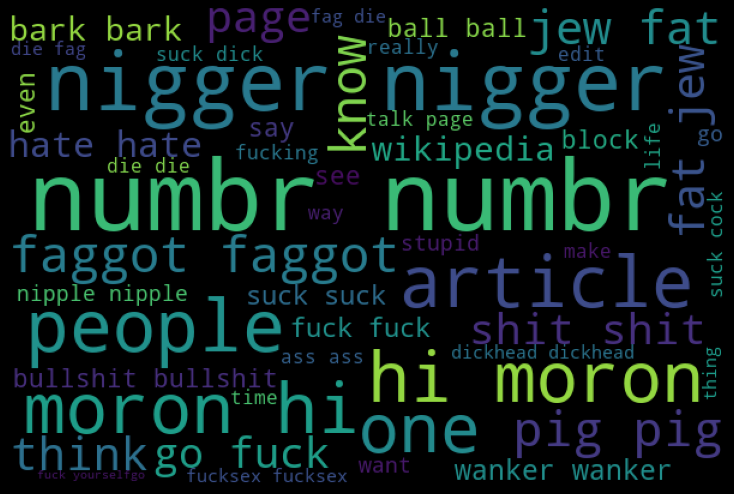

In [20]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = df_train['comment_text'][df_train['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

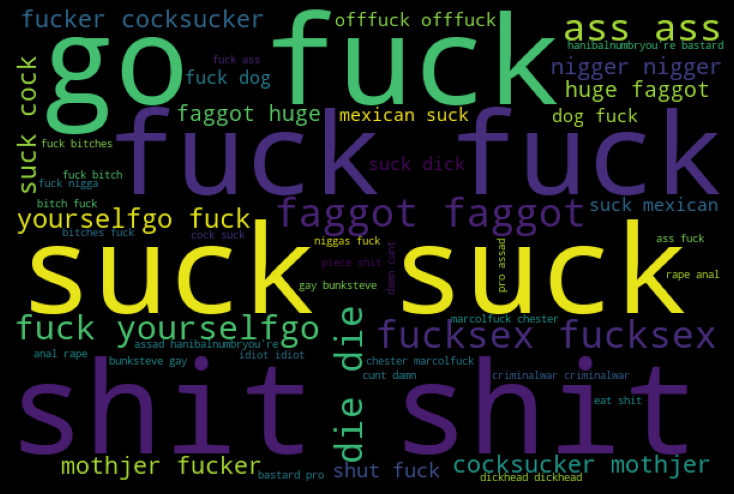

In [21]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = df_train['comment_text'][df_train['highly_malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

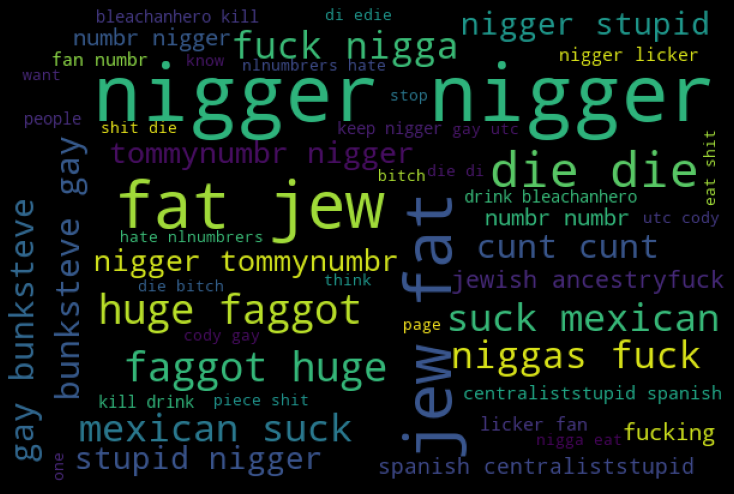

In [22]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = df_train['comment_text'][df_train['loathe']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

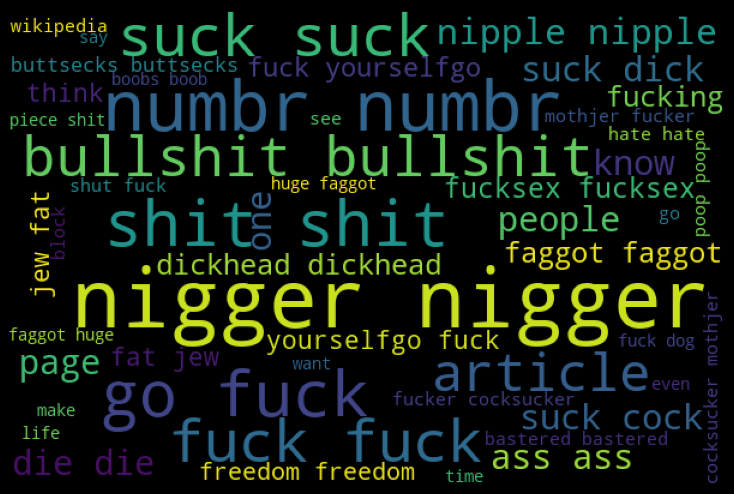

In [23]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = df_train['comment_text'][df_train['rude']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

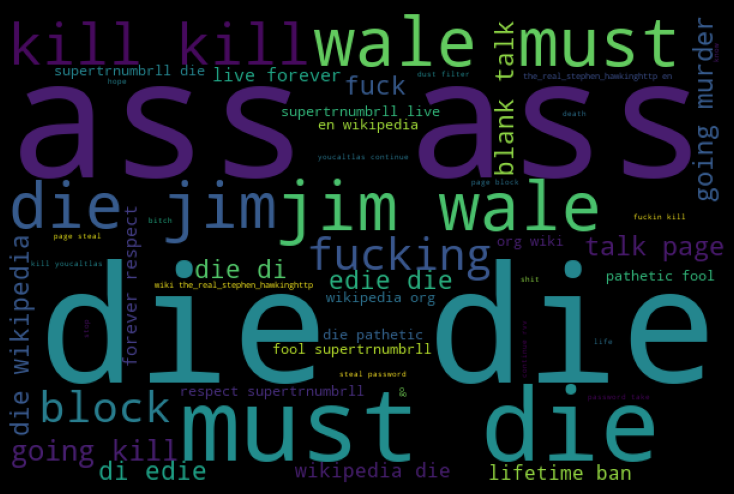

In [24]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = df_train['comment_text'][df_train['threat']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

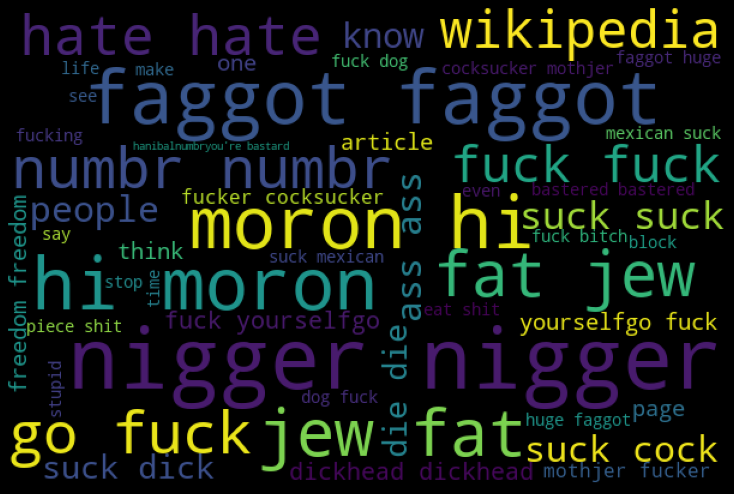

In [25]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = df_train['comment_text'][df_train['abuse']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

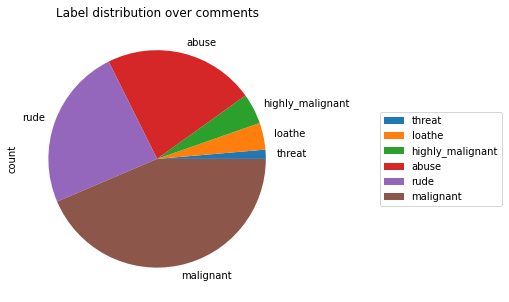

In [27]:
cols_target=['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = df_train[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [ ]:
plt.figure(figsize=18,12)
sns.countplot('length',data = df_train)
plt.xlabel('length', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

In [ ]:
plt.figure(figsize=18,12)
sns.countplot('clean_length',data = df_train)
plt.xlabel('clean_length', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

In [28]:
target_data = df_train[cols_target]

df_train['bad'] =df_train[cols_target].sum(axis =1)
print(df_train['bad'].value_counts())
df_train['bad'] = df_train['bad'] > 0 
df_train['bad'] = df_train['bad'].astype(int)
print(df_train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


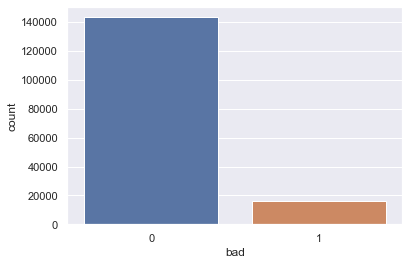

In [29]:
sns.set()
sns.countplot(x="bad" , data = df_train)
plt.show()

In [30]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df_train['comment_text'])
x = features

In [31]:
df_train.shape

(159571, 11)

In [32]:
df_test.shape

(153164, 2)

In [33]:
y=df_train['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [34]:
y_train.shape,y_test.shape

((111699,), (47872,))

In [35]:
# LogisticRegression
lr = LogisticRegression(C=1, max_iter = 3000)

lr.fit(x_train, y_train)

y_pred_train_lr = lr.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train_lr)))
y_pred_test_lr = lr.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test_lr)))
print(confusion_matrix(y_test,y_pred_test_lr))
print(classification_report(y_test,y_pred_test_lr))
cv_score_lr = cross_val_score(lr,x,y,cv=5).mean()
print("CV_Score_lr : ",cv_score_lr)

Training accuracy is 0.9595520103134316
Test accuracy is 0.9553183489304813
[[42729   221]
 [ 1918  3004]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.93      0.61      0.74      4922

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872

CV_Score_lr :  0.9560947720113896


In [36]:
# DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)
y_pred_train_dt = dt.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train_dt)))
y_pred_test_dt = dt.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test_dt)))
print(confusion_matrix(y_test,y_pred_test_dt))
print(classification_report(y_test,y_pred_test_dt))
cv_score_dt = cross_val_score(dt,x,y,cv=5).mean()
print("CV_Score_dt : ",cv_score_dt)

Training accuracy is 0.9988898736783678
Test accuracy is 0.9393591243315508
[[41598  1352]
 [ 1551  3371]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     42950
           1       0.71      0.68      0.70      4922

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.83     47872
weighted avg       0.94      0.94      0.94     47872

CV_Score_dt :  0.9402899015842662


In [37]:
#RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(x_train, y_train)
y_pred_train_rf = rf.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train_rf)))
y_pred_test_rf = rf.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test_rf)))
print(confusion_matrix(y_test,y_pred_test_rf))
print(classification_report(y_test,y_pred_test_rf))
cv_score_rf = cross_val_score(rf,x,y,cv=5).mean()
print("CV_Score_rf : ",cv_score_rf)

Training accuracy is 0.9988809210467416
Test accuracy is 0.9550050133689839
[[42408   542]
 [ 1612  3310]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.86      0.67      0.75      4922

    accuracy                           0.96     47872
   macro avg       0.91      0.83      0.86     47872
weighted avg       0.95      0.96      0.95     47872

CV_Score_rf :  0.9566587864293089


In [38]:
# xgboost
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_train_xgb = xgb.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train_xgb)))
y_pred_test_xgb = xgb.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test_xgb)))
print(confusion_matrix(y_test,y_pred_test_xgb))
print(classification_report(y_test,y_pred_test_xgb))
cv_score_xgb = cross_val_score(xgb,x,y,cv=5).mean()
print("CV_Score_xgb : ",cv_score_xgb)

Training accuracy is 0.9614052050600274
Test accuracy is 0.9526236631016043
[[42689   261]
 [ 2007  2915]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     42950
           1       0.92      0.59      0.72      4922

    accuracy                           0.95     47872
   macro avg       0.94      0.79      0.85     47872
weighted avg       0.95      0.95      0.95     47872

CV_Score_xgb :  0.95377606084172


In [39]:
#AdaBoostClassifier
adb=AdaBoostClassifier(n_estimators=100)
adb.fit(x_train, y_train)
y_pred_train_adb = adb.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train_adb)))
y_pred_test_adb = adb.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test_adb)))
print(confusion_matrix(y_test,y_pred_test_adb))
print(classification_report(y_test,y_pred_test_adb))
cv_score_adb = cross_val_score(adb,x,y,cv=5).mean()
print("CV_Score_adb : ",cv_score_adb)

Training accuracy is 0.951118631321677
Test accuracy is 0.9490307486631016
[[42553   397]
 [ 2043  2879]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     42950
           1       0.88      0.58      0.70      4922

    accuracy                           0.95     47872
   macro avg       0.92      0.79      0.84     47872
weighted avg       0.95      0.95      0.94     47872

CV_Score_adb :  0.9495522296620231


In [40]:
#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train_knn = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train_knn)))
y_pred_test_knn = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test_knn)))
print(confusion_matrix(y_test,y_pred_test_knn))
print(classification_report(y_test,y_pred_test_knn))
cv_score_knn = cross_val_score(knn,x,y,cv=5).mean()
print("CV_Score_knn : ",cv_score_knn)

Training accuracy is 0.922300110117369
Test accuracy is 0.9173629679144385
[[42809   141]
 [ 3815  1107]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     42950
           1       0.89      0.22      0.36      4922

    accuracy                           0.92     47872
   macro avg       0.90      0.61      0.66     47872
weighted avg       0.91      0.92      0.89     47872

CV_Score_knn :  0.9186130291349448


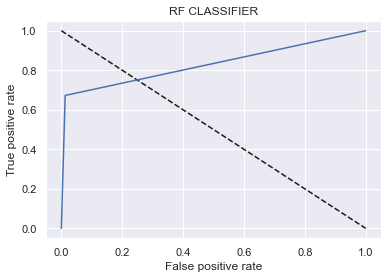

In [41]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction
# model is performing good :
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test_rf)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RF Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RF CLASSIFIER')
plt.show()

In [43]:
import eli5
eli5.show_weights(rf,vec = tf_vec, top = 15)  #random forest
# will give you top 15 features or words  which makes a comment toxic

Weight,Feature
0.0683 ± 0.0555,fuck
0.0410 ± 0.0445,fucking
0.0303 ± 0.0303,shit
0.0199 ± 0.0125,idiot
0.0195 ± 0.0209,bitch
0.0191 ± 0.0174,suck
0.0187 ± 0.0123,stupid
0.0161 ± 0.0157,asshole
0.0118 ± 0.0117,dick
0.0114 ± 0.0110,faggot


In [45]:
test_data =tf_vec.fit_transform(df_test['comment_text'])
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [46]:
prediction=rf.predict(test_data)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
import joblib
joblib.dump(rf,"malig.pkl")

['malig.pkl']